## libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

## datacleaning

In [3]:
df=pd.read_csv('/content/drive/MyDrive/ISM PROJ/Datasets/train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
df.shape

(20800, 5)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(18285, 5)

In [9]:
X=df.drop('label',axis=1)

In [10]:
y=df['label']

In [11]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [12]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

## text preprocessing

In [13]:
messages = df.copy()

In [14]:
messages.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [74]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [16]:
ps = PorterStemmer()
input_data = []
for i in messages.index:
    text = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    text = text.lower()
    text = text.split()
    
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    input_data.append(text)

In [17]:
input_data[0]

'hous dem aid even see comey letter jason chaffetz tweet'

## count vectorization

In [18]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,5))
# X = cv.fit_transform(input_data).toarray()
Fit = cv.fit(input_data)
X = Fit.transform(input_data).toarray()

In [19]:
input_data

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [20]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
for i in range(len(X[0])):
    if X[0][i] == 1:
        print(i,X[0][i],cv.get_feature_names()[i])  

92 1 aid
637 1 chaffetz
808 1 comey
810 1 comey letter
1089 1 dem
1433 1 even
2046 1 hous
2226 1 jason
2227 1 jason chaffetz
2450 1 letter
3854 1 see
4601 1 tweet


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'abus new york time',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'aclu',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'act like',
 'act new',
 'act new york',
 'act new york time',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advis new',
 'advis new york',
 'advis new york time',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'african american',
 'aftermath',
 'ag',
 'age',
 'age new',
 'age new york',
 'age n

In [23]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 5),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [24]:
count = pd.DataFrame(X, columns=cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
pd.set_option('display.max_columns', None)

In [26]:
count.head()

abandon  abc  abc news  abduct  abe  abedin  abl  abort  abroad  absolut  \
0        0    0         0       0    0       0    0      0       0        0   
1        0    0         0       0    0       0    0      0       0        0   
2        0    0         0       0    0       0    0      0       0        0   
3        0    0         0       0    0       0    0      0       0        0   
4        0    0         0       0    0       0    0      0       0        0   

   absurd  abus  abus new  abus new york  abus new york time  accept  access  \
0       0     0         0              0                   0       0       0   
1       0     0         0              0                   0       0       0   
2       0     0         0              0                   0       0       0   
3       0     0         0              0                   0       0       0   
4       0     0         0              0                   0       0       0   

   access pipelin  access pipelin protest  accid  accident  accord  account  \
0               0                       0      0         0       0        0   
1               0                       0      0         0       0        0   
2               0                       0      0         0       0        0   
3               0                       0      0         0       0        0   
4               0                       0      0         0       0        0   

   accus  accus trump  achiev  acknowledg  acknowledg emf  \
0      0            0       0           0               0   
1      0            0       0           0               0   
2      0            0       0           0               0   
3      0            0       0           0               0   
4      0            0       0           0               0   

   acknowledg emf damag  aclu  acquit  acquitt  acr  across  act  act like  \
0                     0     0       0        0    0       0    0         0   
1                     0     0       0        0    0       0    0         0   
2                     0     0       0        0    0       0    0         0   
3                     0     0       0        0    0       0    0         0   
4                     0     0       0        0    0       0    0         0   

   act new  act new york  act new york time  action  activ  activist  actor  \
0        0             0                  0       0      0         0      0   
1        0             0                  0       0      0         0      0   
2        0             0                  0       0      0         0      0   
3        0             0                  0       0      0         0      0   
4        0             0                  0       0      0         0      0   

   actual  ad  adam  add  addict  address  adhd  admin  administr  admir  \
0       0   0     0    0       0        0     0      0          0      0   
1       0   0     0    0       0        0     0      0          0      0   
2       0   0     0    0       0        0     0      0          0      0   
3       0   0     0    0       0        0     0      0          0      0   
4       0   0     0    0       0        0     0      0          0      0   

   admit  adopt  adult  advanc  advertis  advic  advis  advis new  \
0      0      0      0       0         0      0      0          0   
1      0      0      0       0         0      0      0          0   
2      0      0      0       0         0      0      0          0   
3      0      0      0       0         0      0      0          0   
4      0      0      0       0         0      0      0          0   

   advis new york  advis new york time  advisor  advoc  affair  affect  \
0               0                    0        0      0       0       0   
1               0                    0        0      0       0       0   
2               0                    0        0      0       0       0   
3               0                    0        0      0       0       0   
4               0  

In [27]:
X.shape

(18285, 5000)

In [28]:
y=messages['label']

## train test split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
len(X_train),len(X_test)

(12799, 5486)

In [31]:
y_test

6421     1
19975    0
18089    0
16669    0
10029    0
        ..
15644    0
9201     0
19994    1
6758     0
857      1
Name: label, Length: 5486, dtype: int64

## training

### Naive bayes

In [32]:
model1=MultinomialNB()

In [33]:
model1.fit(X_train, y_train)

MultinomialNB()

In [34]:
pred = model1.predict(X_test)

In [35]:
pred

array([1, 0, 0, ..., 1, 0, 1])

In [36]:
score = metrics.accuracy_score(y_test, pred)

In [37]:
score

0.9021144732045207

In [38]:
cm = metrics.confusion_matrix(y_test, pred)

In [39]:
cm

array([[2758,  320],
       [ 217, 2191]])

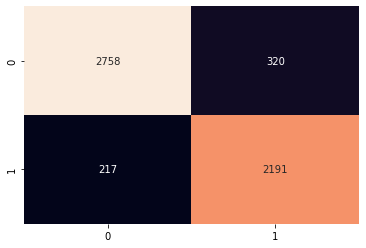

In [40]:
sns.heatmap(cm, annot=True, fmt='d', cbar=False)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3078
           1       0.87      0.91      0.89      2408

    accuracy                           0.90      5486
   macro avg       0.90      0.90      0.90      5486
weighted avg       0.90      0.90      0.90      5486



### Random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
pred = model2.predict(X_test)

In [44]:
pred

array([1, 0, 0, ..., 1, 0, 1])

In [45]:
score = metrics.accuracy_score(y_test, pred)

In [46]:
score

0.9345606999635435

In [47]:
cm = metrics.confusion_matrix(y_test, pred)

In [48]:
cm

array([[2786,  292],
       [  67, 2341]])

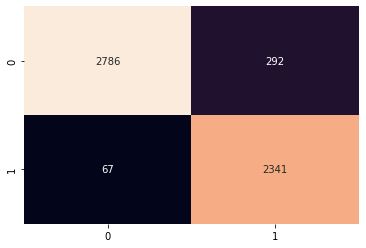

In [49]:
sns.heatmap(cm, annot=True, fmt='d', cbar=False)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      3078
           1       0.89      0.97      0.93      2408

    accuracy                           0.93      5486
   macro avg       0.93      0.94      0.93      5486
weighted avg       0.94      0.93      0.93      5486



### decision tree

In [51]:
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
pred = model3.predict(X_test)

In [53]:
pred

array([1, 0, 0, ..., 1, 0, 1])

In [54]:
score = metrics.accuracy_score(y_test, pred)

In [55]:
score

0.9181553044112286

In [56]:
cm = metrics.confusion_matrix(y_test, pred)

In [57]:
cm

array([[2824,  254],
       [ 195, 2213]])

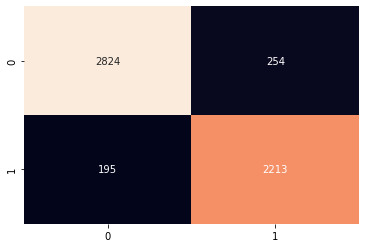

In [58]:
sns.heatmap(cm, annot=True, fmt='d', cbar=False)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3078
           1       0.90      0.92      0.91      2408

    accuracy                           0.92      5486
   macro avg       0.92      0.92      0.92      5486
weighted avg       0.92      0.92      0.92      5486



## saving model

In [60]:
import joblib
joblib.dump(model1, "/content/drive/MyDrive/ISM PROJ/models/naviebayes.sav")

['/content/drive/MyDrive/ISM PROJ/models/naviebayes.sav']

In [61]:
import joblib
joblib.dump(model2, "/content/drive/MyDrive/ISM PROJ/models/randomforest.sav")

['/content/drive/MyDrive/ISM PROJ/models/randomforest.sav']

In [62]:
import joblib
joblib.dump(model3, "/content/drive/MyDrive/ISM PROJ/models/decisiontree.sav")

['/content/drive/MyDrive/ISM PROJ/models/decisiontree.sav']

In [63]:
import joblib
joblib.dump(Fit, "/content/drive/MyDrive/ISM PROJ/models/cv.sav")

['/content/drive/MyDrive/ISM PROJ/models/cv.sav']